First read in data and load necessary packages. Create grid of inputs which is superset of predictor vectors in training data.

In [1]:
import pandas as pd

train=pd.read_csv('C:\local\Visual Studio 2019\PythonAnalyses\data\HW2P2_train.csv')
test=pd.read_csv('C:\local\Visual Studio 2019\PythonAnalyses\data\HW2P2_test.csv')

import itertools, numpy as np
x1seq=list(np.linspace(min(train['X1'].tolist())-2,max(train['X1'].tolist())+2,100))
x2seq=list(np.linspace(min(train['X2'].tolist())-2,max(train['X2'].tolist())+2,100))
grid=pd.DataFrame(list(itertools.product(x1seq,x2seq)))
grid.columns=['X1','X2']

positives=train[train['Y']==1]
negatives=train[train['Y']==0]

First fit a simple logistic regression model and linear discriminant analysis (LDA) model. Decision boundaries are nearly identical.

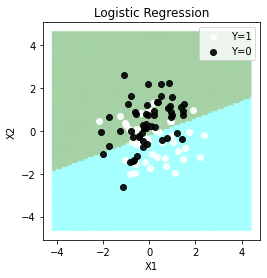

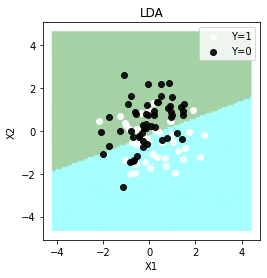

In [2]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(random_state=3).fit(train.drop('Y',axis=1),train['Y'].tolist())
grid_log_predict=list(log_model.predict(grid))

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model=LinearDiscriminantAnalysis().fit(train.drop('Y',axis=1),train['Y'].tolist())
grid_lda_predict=list(lda_model.predict(grid))

import matplotlib
import matplotlib.pyplot as pyplot

fig1, axs1 = pyplot.subplots()
fig2, axs2 = pyplot.subplots()

axs1.scatter(grid['X1'].tolist(),grid['X2'].tolist(),c=grid_log_predict, cmap=matplotlib.colors.ListedColormap(['green','cyan']), alpha=.2,s=3)
axs1.scatter(positives['X1'].tolist(),positives['X2'].tolist(),c='white',label='Y=1',alpha=.9)
axs1.scatter(negatives['X1'].tolist(),negatives['X2'].tolist(),c='black',label='Y=0',alpha=.9)
axs1.legend()
axs1.set_ylabel('X2')
axs1.set_xlabel('X1')
axs1.set_title('Logistic Regression')

axs2.scatter(grid['X1'].tolist(),grid['X2'].tolist(),c=grid_lda_predict, cmap=matplotlib.colors.ListedColormap(['green','cyan']), alpha=.2,s=3)
axs2.scatter(positives['X1'].tolist(),positives['X2'].tolist(),c='white',label='Y=1',alpha=.9)
axs2.scatter(negatives['X1'].tolist(),negatives['X2'].tolist(),c='black',label='Y=0',alpha=.9)
axs2.legend()
axs2.set_ylabel('X2')
axs2.set_xlabel('X1')
axs2.set_title('LDA')

axs1.set_box_aspect(1)
axs2.set_box_aspect(1)

pyplot.show()

Although very similar, decision boundaries must be slighly different since testing error rates differ.

In [18]:
print('Logistic regression training error')
print(str(1-log_model.score(train.drop('Y',axis=1),train['Y'])))

print('Logistic regression testing error')
print(str(1-log_model.score(test.drop('Y',axis=1),test['Y'])))

print('LDA training error')
print(str(1-lda_model.score(train.drop('Y',axis=1),train['Y'])))

print('LDA testing error')
print(str(1-lda_model.score(test.drop('Y',axis=1),test['Y'])))

Logistic regression training error
0.33999999999999997
Logistic regression testing error
0.29733333333333334
LDA training error
0.33999999999999997
LDA testing error
0.29666666666666663


Quadratic discriminant analysis (QDA) has a more interesting decision boundary, but slightly poorer testing performance than logistic regression and LDA. 

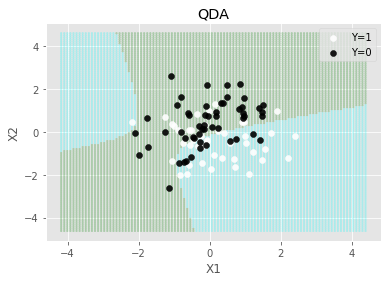

QDA training error
0.31000000000000005
QDA testing error
0.31333333333333335


In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model=QuadraticDiscriminantAnalysis().fit(train.drop('Y',axis=1),train['Y'].tolist())
grid_qda_predict=list(qda_model.predict(grid))

pyplot.style.use('ggplot')
pyplot.scatter(grid['X1'].tolist(),grid['X2'].tolist(),c=grid_qda_predict, cmap=matplotlib.colors.ListedColormap(['green','cyan']), alpha=.2,s=3)
pyplot.scatter(positives['X1'].tolist(),positives['X2'].tolist(),c='white',label='Y=1',alpha=.9)
pyplot.scatter(negatives['X1'].tolist(),negatives['X2'].tolist(),c='black',label='Y=0',alpha=.9)
pyplot.legend()
pyplot.ylabel('X2')
pyplot.xlabel('X1')
pyplot.title('QDA')
pyplot.show()

print('QDA training error')
print(str(1-qda_model.score(train.drop('Y',axis=1),train['Y'])))

print('QDA testing error')
print(str(1-qda_model.score(test.drop('Y',axis=1),test['Y'])))

Fitting support vector classifiers (SVCs) with radial kernels (given gamma parameter) and varying cost values. The cost parameter C specifies the sum of square distances of points from the decision boundary where the point is outside of the decision region for its response classification (this distance is 0 if the point's classification coincides with its classification predicted by the SVC). As a result, C is generally proportional to the number of points which 'fall' on the wrong side of the classifier with respect to their associated response value. Also, C generally results in more complex boundary regions.

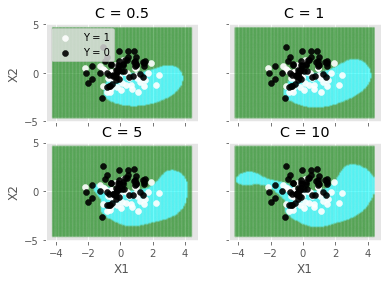

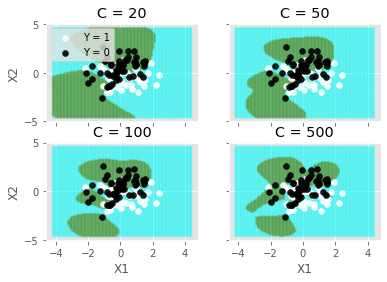

In [22]:
from sklearn.svm import SVC

c_seq=[.5,1,5,10,20,50,100,500]
svc_training_predictions, svc_gid_predictions = [], []

fig1, axs1 = pyplot.subplots(2,2)
fig2, axs2 = pyplot.subplots(2,2)

def grid_plot(model, train, grid, axs, colors, _alpha, s, title):
    
    grid_predictions=model.predict(grid).tolist() 
    positives=train[train['Y']==1]
    negatives=train[train['Y']==0]

    axs.scatter(grid['X1'].tolist(),grid['X2'].tolist(),c=grid_predictions,cmap=matplotlib.colors.ListedColormap(['green','cyan']),alpha=_alpha,s=3)
    axs.scatter(positives['X1'].tolist(),positives['X2'].tolist(),c='white',label='Y = 1',alpha=.9)
    axs.scatter(negatives['X1'].tolist(),negatives['X2'].tolist(),c='black',label='Y = 0',alpha=.9)
    axs.set_ylabel('X2')
    axs.set_xlabel('X1')
    axs.set_title(title)

svc_training_errors, svc_testing_errors = [], []
for i, c in enumerate(c_seq):
    svc=SVC(C=c).fit(train.drop('Y',axis=1),train['Y'])
        
    row = int(i/2)
    col = int(i % 2 == 1)

    if i <= 3:
        grid_plot(svc,train,grid,axs1[row,col],['blue','cyan'],.2,3,'C = '+str(c))
        axs1[row,col].label_outer()
    else: 
        grid_plot(svc,train,grid,axs2[row-2,col],['blue','cyan'],.2,3,'C = '+str(c))
        axs2[row-2,col].label_outer()

    if(i==0):
        axs1[row,col].legend()
    if(i==4):
        axs2[row-2,col].legend()

    svc_training_errors.append(1-svc.score(train.drop('Y',axis=1),train['Y']))
    svc_testing_errors.append(1-svc.score(test.drop('Y',axis=1),test['Y']))

pyplot.show()

As C increases, the SVC is increasingly more likely to be overfit to the data. Accordingly, notice the training error rates are generally decreasing, but the testing error rates are generally increasing (up to a point). Descreasing of the training error rate was expected when increasing C, since larger C allows for a more complex decision boundary which is closer to an interpolation of the training set. However, overly complex decision boundaries are more likely to poorly estimate the true relationship between the covariates and response.

In [23]:
for i, c in enumerate(c_seq):
    print('SVC with C = '+str(c))
    print('Training error: ' + str(svc_training_errors[i]))
    print('Testing error: '+str(svc_testing_errors[i]))

SVC with C = 0.5
Training error: 0.31999999999999995
Testing error: 0.30866666666666664
SVC with C = 1
Training error: 0.31000000000000005
Testing error: 0.30066666666666664
SVC with C = 5
Training error: 0.27
Testing error: 0.33666666666666667
SVC with C = 10
Training error: 0.30000000000000004
Testing error: 0.356
SVC with C = 20
Training error: 0.25
Testing error: 0.3586666666666667
SVC with C = 50
Training error: 0.24
Testing error: 0.3573333333333333
SVC with C = 100
Training error: 0.22999999999999998
Testing error: 0.368
SVC with C = 500
Training error: 0.17000000000000004
Testing error: 0.3546666666666667


Finding minimum average testing error rate from 10-fold cross validation over range of C values.

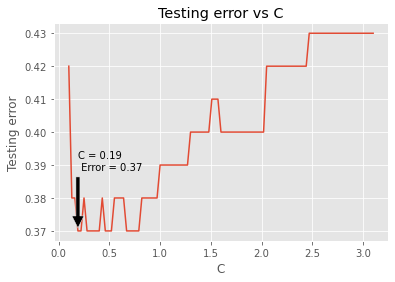

In [32]:
from sklearn import GridSearchCV
np.random.seed(17)
c_seq=np.linspace(.1, 3.1, 101)

svc_cv_on_c=GridSearchCV(SVC(),{'C':list(c_seq)},cv=10)
svc_cv_on_c.fit(train.drop('Y',axis=1),train['Y'])

fig, ax = pyplot.subplots()
ax.plot(c_seq,list(1-svc_cv_on_c.cv_results_['mean_test_score']))
c_rank_1=list(svc_cv_on_c.cv_results_['rank_test_score']).index(1)
min_error_cv_on_c=1-svc_cv_on_c.cv_results_['mean_test_score'][c_rank_1]

ax.annotate('C = '+str(round(c_seq[c_rank_1],4))+'\n Error = '+str(round(min_error_cv_on_c,4)), 
            xy=(c_seq[c_rank_1],min_error_cv_on_c), 
            xytext=(c_seq[c_rank_1], min_error_cv_on_c*1.05),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_ylabel('Testing error')
ax.set_xlabel('C')
ax.set_title('Testing error vs C')
pyplot.show()

A similar procedure finds the gamma (G) paramter (in some countable set of candidates) with the minimum average testing error. 

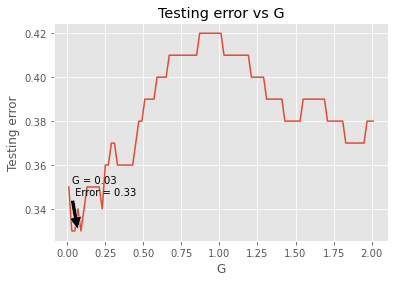

In [33]:
np.random.seed(17)
g_seq=np.linspace(.01,2.01,101)

svc_cv_on_g=GridSearchCV(SVC(),{'gamma':list(g_seq)},cv=10)
svc_cv_on_g.fit(train.drop('Y',axis=1),train['Y'])

fig, ax = pyplot.subplots()
ax.plot(g_seq,list(1-svc_cv_on_g.cv_results_['mean_test_score']))
g_rank_1=list(svc_cv_on_g.cv_results_['rank_test_score']).index(1)
min_error_cv_on_g=1-svc_cv_on_g.cv_results_['mean_test_score'][g_rank_1]

ax.annotate('G = '+str(round(g_seq[g_rank_1],4))+'\n Error = '+str(round(min_error_cv_on_g,4)), 
            xy=(g_seq[c_rank_1],min_error_cv_on_g), 
            xytext=(g_seq[g_rank_1], min_error_cv_on_g*1.05),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
ax.set_ylabel('Testing error')
ax.set_xlabel('G')
ax.set_title('Testing error vs G')
pyplot.show()

However, combining the values of C and G with minimum testing error is not ideal. Better is to fit an SVC on the training data for each value of C and G in some prespecified ranges, and find the combination with the smallest average testing error rate over k-folds (here k = 5).

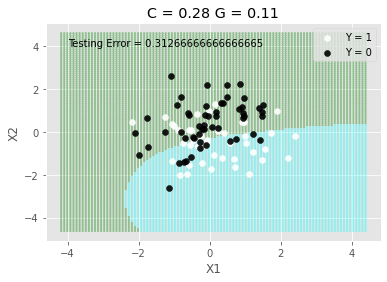

In [35]:
np.random.seed(17)

paramters={'C':list(c_seq),'gamma':list(g_seq)}
svc_cv=GridSearchCV(SVC(),paramters)
svc_cv.fit(train.drop('Y',axis=1),train['Y'].tolist())
grid_svc_predict=list(svc_cv.best_estimator_.predict(grid))

fig, ax = pyplot.subplots()
svc_cv_best_model_plot_title='C = '+str(svc_cv.best_estimator_.C)+' G = '+str(round(svc_cv.best_estimator_.gamma,3))
grid_plot(svc_cv.best_estimator_,train,grid,ax,['green','cyan'],.3,3,svc_cv_best_model_plot_title)
pyplot.text(-4,4,'Testing Error = '+str(1-svc_cv.best_estimator_.score(test.drop('Y',axis=1),test['Y'])))
ax.legend()
pyplot.show()